## Business objective and the data<br>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 


The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

 



## Customer behaviour during churn<br>
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of the customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than in the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

## Data preparation<br>
The following data preparation steps are crucial for this problem:

### 1. Filter high-value customers<br>

As mentioned above, you need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).After filtering the high-value customers, you should get about 30k rows.

### 2. Tag churners and remove attributes of the churn phase<br>

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

###### Steps to be followed: 

1) Data Cleaning
2) Data Preparation
3) EDA
4) Data split & Resampling 
5) Preprocessing
6) Model Selection
7) Model Evaluation
8) Prediction on Test set 

###### Loading basic Libraries

In [1]:
# Importing Libraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Import warnings and setting display options
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',250)

In [3]:
# Reading the dataset file
telecom_data=pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# calculating the Shape of the intial dataset
telecom_data.shape

(99999, 226)

In [5]:
# calculating the Unique Values for each Columns
for columns in telecom_data.columns:
    count=telecom_data[columns].nunique()
    print(f'{columns}:{count}')

mobile_number:99999
circle_id:1
loc_og_t2o_mou:1
std_og_t2o_mou:1
loc_ic_t2o_mou:1
last_date_of_month_6:1
last_date_of_month_7:1
last_date_of_month_8:1
last_date_of_month_9:1
arpu_6:85681
arpu_7:85308
arpu_8:83615
arpu_9:79937
onnet_mou_6:24313
onnet_mou_7:24336
onnet_mou_8:24089
onnet_mou_9:23565
offnet_mou_6:31140
offnet_mou_7:31023
offnet_mou_8:30908
offnet_mou_9:30077
roam_ic_mou_6:6512
roam_ic_mou_7:5230
roam_ic_mou_8:5315
roam_ic_mou_9:4827
roam_og_mou_6:8038
roam_og_mou_7:6639
roam_og_mou_8:6504
roam_og_mou_9:5882
loc_og_t2t_mou_6:13539
loc_og_t2t_mou_7:13411
loc_og_t2t_mou_8:13336
loc_og_t2t_mou_9:12949
loc_og_t2m_mou_6:20905
loc_og_t2m_mou_7:20637
loc_og_t2m_mou_8:20544
loc_og_t2m_mou_9:20141
loc_og_t2f_mou_6:3860
loc_og_t2f_mou_7:3863
loc_og_t2f_mou_8:3807
loc_og_t2f_mou_9:3758
loc_og_t2c_mou_6:2235
loc_og_t2c_mou_7:2426
loc_og_t2c_mou_8:2516
loc_og_t2c_mou_9:2332
loc_og_mou_6:26372
loc_og_mou_7:26091
loc_og_mou_8:25990
loc_og_mou_9:25376
std_og_t2t_mou_6:18244
std_og_t2t_mou

In [6]:
# Data types of Columns
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

###### Obsevation:

    1) Dataset has total of 99999 Rows
    2) Dataset has total of 226 Columns
        a) Float type - 179 Columns
        b) Int type - 35 Columns
        c) Object type - 12 Columns

###### Data Cleaning & Missing Value Treatment

In [7]:
# Categorical columns
cat_cols=telecom_data.select_dtypes(exclude=['int64','float64']).columns
cat_cols

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [8]:
# Unique counts in categorical columns
cat_cols_count=telecom_data[cat_cols].nunique().sort_values()
cat_cols_count

last_date_of_month_6         1
last_date_of_month_7         1
last_date_of_month_8         1
last_date_of_month_9         1
date_of_last_rech_6         30
date_of_last_rech_9         30
date_of_last_rech_data_6    30
date_of_last_rech_data_9    30
date_of_last_rech_7         31
date_of_last_rech_8         31
date_of_last_rech_data_7    31
date_of_last_rech_data_8    31
dtype: int64

In [9]:
# Reading categorical columns
telecom_data[cat_cols]

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/3/2014,7/20/2014,8/26/2014,9/25/2014,NaN,NaN,NaN,NaN
99995,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/17/2014,8/24/2014,9/26/2014,NaN,NaN,NaN,NaN
99996,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/13/2014,7/26/2014,NaN,9/2/2014,6/13/2014,NaN,NaN,NaN
99997,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014,6/17/2014,7/19/2014,8/20/2014,9/17/2014


In [10]:
# We are dropping all date type categorical columns as it  contains only date value as we are not going to derive anything from these dates 
telecom_data=telecom_data.drop(cat_cols,axis=1)
telecom_data.shape

(99999, 214)

In [11]:
# Checking numerical columns which as one unique value
to_be_droped=telecom_data.nunique().sort_values()
to_be_droped=pd.DataFrame(to_be_droped)
to_be_droped.columns=['Nunique']
to_be_droped=to_be_droped[to_be_droped['Nunique']==1].index
to_be_droped

Index(['std_ic_t2o_mou_6', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_9',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_7', 'std_og_t2c_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'loc_ic_t2o_mou',
       'std_og_t2o_mou', 'loc_og_t2o_mou', 'circle_id'],
      dtype='object')

In [12]:
# Droping numerical columns which as one unique value
telecom_data=telecom_data.drop(to_be_droped,axis=1)
telecom_data.shape

(99999, 202)

In [13]:
# Checking numerical columns which as Two unique value
unique_count_2=telecom_data.nunique().sort_values()
unique_count_2=pd.DataFrame(unique_count_2)
unique_count_2.columns=['Nunique']
unique_count_2=unique_count_2[unique_count_2['Nunique']==2].index
unique_count_2

Index(['night_pck_user_7', 'night_pck_user_9', 'fb_user_9', 'fb_user_8',
       'fb_user_7', 'fb_user_6', 'night_pck_user_6', 'night_pck_user_8'],
      dtype='object')

In [14]:
# The Two values for the selected columns are 0,1
telecom_data[unique_count_2].describe()

,night_pck_user_7,night_pck_user_9,fb_user_9,fb_user_8,fb_user_7,fb_user_6,night_pck_user_6,night_pck_user_8
count,25571.000000,25922.000000,25922.000000,26339.000000,25571.000000,25153.000000,25153.000000,26339.000000
mean,0.023034,0.015971,0.860968,0.890808,0.908764,0.914404,0.025086,0.020844
std,0.150014,0.125366,0.345987,0.311885,0.287950,0.279772,0.156391,0.142863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Zero can't be used for missing values Hence using -1 for missing values
telecom_data[unique_count_2] = telecom_data[unique_count_2].replace(np.NaN,-1)

In [16]:
# After dealing with the columns having unique values of 1 and 2, the remaining numerical columns
num_cols=telecom_data.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=202)

In [17]:
# Null Value % in the remaining numerical columns
round(telecom_data[num_cols].isnull().sum()/len(telecom_data.index),4).sort_values(ascending=False)*100

max_rech_data_6       74.85
total_rech_data_6     74.85
arpu_2g_6             74.85
count_rech_2g_6       74.85
arpu_3g_6             74.85
count_rech_3g_6       74.85
av_rech_amt_data_6    74.85
arpu_3g_7             74.43
av_rech_amt_data_7    74.43
max_rech_data_7       74.43
count_rech_2g_7       74.43
count_rech_3g_7       74.43
total_rech_data_7     74.43
arpu_2g_7             74.43
arpu_2g_9             74.08
total_rech_data_9     74.08
max_rech_data_9       74.08
av_rech_amt_data_9    74.08
count_rech_3g_9       74.08
arpu_3g_9             74.08
count_rech_2g_9       74.08
count_rech_2g_8       73.66
av_rech_amt_data_8    73.66
total_rech_data_8     73.66
max_rech_data_8       73.66
count_rech_3g_8       73.66
arpu_3g_8             73.66
arpu_2g_8             73.66
ic_others_9            7.75
std_og_mou_9           7.75
std_og_t2f_mou_9       7.75
std_og_t2m_mou_9       7.75
loc_ic_t2m_mou_9       7.75
isd_ic_mou_9           7.75
loc_ic_t2f_mou_9       7.75
spl_ic_mou_9        

In [18]:
# Dealing With null values in  numerical recharge columns
telecom_rech_columns=telecom_data.columns[telecom_data.columns.str.contains('rech_amt|rech_data')]
telecom_rech_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [19]:
# Null Value % in the remaining numerical recharge columns
round(telecom_data[telecom_rech_columns].isnull().sum()/len(telecom_data.index),4)

total_rech_amt_6      0.0000
total_rech_amt_7      0.0000
total_rech_amt_8      0.0000
total_rech_amt_9      0.0000
max_rech_amt_6        0.0000
max_rech_amt_7        0.0000
max_rech_amt_8        0.0000
max_rech_amt_9        0.0000
total_rech_data_6     0.7485
total_rech_data_7     0.7443
total_rech_data_8     0.7366
total_rech_data_9     0.7408
max_rech_data_6       0.7485
max_rech_data_7       0.7443
max_rech_data_8       0.7366
max_rech_data_9       0.7408
av_rech_amt_data_6    0.7485
av_rech_amt_data_7    0.7443
av_rech_amt_data_8    0.7366
av_rech_amt_data_9    0.7408
dtype: float64

In [20]:
# If the value of the selected column is null that means the Customer has not used rechaged, Hence inputing Zero in place of Null values
telecom_data[telecom_rech_columns] = telecom_data[telecom_rech_columns].replace(np.NaN,0.0)

In [21]:
# Null Value % in the remaining numerical recharge columns after making changes
round(telecom_data[telecom_rech_columns].isnull().sum()/len(telecom_data.index),4)

total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64

In [22]:
# Null Value % in the remaining numerical columns
round(telecom_data[num_cols].isnull().sum()/len(telecom_data.index),4).sort_values(ascending=False)*100

arpu_3g_6             74.85
count_rech_3g_6       74.85
count_rech_2g_6       74.85
arpu_2g_6             74.85
arpu_3g_7             74.43
count_rech_2g_7       74.43
arpu_2g_7             74.43
count_rech_3g_7       74.43
arpu_3g_9             74.08
arpu_2g_9             74.08
count_rech_2g_9       74.08
count_rech_3g_9       74.08
arpu_3g_8             73.66
count_rech_3g_8       73.66
arpu_2g_8             73.66
count_rech_2g_8       73.66
loc_og_mou_9           7.75
loc_ic_t2m_mou_9       7.75
loc_ic_mou_9           7.75
spl_og_mou_9           7.75
loc_og_t2c_mou_9       7.75
isd_ic_mou_9           7.75
isd_og_mou_9           7.75
spl_ic_mou_9           7.75
std_og_t2t_mou_9       7.75
loc_og_t2f_mou_9       7.75
std_ic_t2m_mou_9       7.75
std_og_t2m_mou_9       7.75
std_ic_mou_9           7.75
std_og_mou_9           7.75
std_og_t2f_mou_9       7.75
std_ic_t2t_mou_9       7.75
std_ic_t2f_mou_9       7.75
og_others_9            7.75
ic_others_9            7.75
loc_og_t2m_mou_9    

In [23]:
# Reading the Numerical columns
telecom_data[num_cols]

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00

In [24]:
#  Checking columns with more than or equal to 50% null values
Cols_null_value_more_than_50=telecom_data.columns[round((telecom_data.isnull().sum()/len(telecom_data.index))*100,2)>=50]
Cols_null_value_more_than_50

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9'],
      dtype='object')

In [25]:
# All columns with more than or equal to 50% null values are being dropped
telecom_data=telecom_data.drop(Cols_null_value_more_than_50,axis=1)

In [26]:
# Shape of the updated dataset
telecom_data.shape

(99999, 186)

In [27]:
# Null Value % in the remaining columns
round(telecom_data.isnull().sum()/len(telecom_data.index),4).sort_values(ascending=False)*100

loc_og_t2f_mou_9      7.75
std_og_t2t_mou_9      7.75
loc_og_t2t_mou_9      7.75
loc_og_t2m_mou_9      7.75
std_ic_t2m_mou_9      7.75
std_ic_t2t_mou_9      7.75
loc_og_t2c_mou_9      7.75
loc_ic_mou_9          7.75
loc_og_mou_9          7.75
loc_ic_t2f_mou_9      7.75
roam_og_mou_9         7.75
std_og_t2m_mou_9      7.75
loc_ic_t2m_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_mou_9          7.75
loc_ic_t2t_mou_9      7.75
isd_og_mou_9          7.75
og_others_9           7.75
std_ic_t2f_mou_9      7.75
spl_og_mou_9          7.75
isd_ic_mou_9          7.75
onnet_mou_9           7.75
ic_others_9           7.75
spl_ic_mou_9          7.75
roam_ic_mou_9         7.75
offnet_mou_9          7.75
std_ic_mou_9          7.75
onnet_mou_8           5.38
std_og_t2f_mou_8      5.38
loc_og_mou_8          5.38
loc_ic_t2f_mou_8      5.38
loc_ic_t2t_mou_8      5.38
isd_ic_mou_8          5.38
loc_ic_t2m_mou_8      5.38
std_og_t2t_mou_8      5.38
isd_og_mou_8          5.38
loc_ic_mou_8          5.38
o

In [28]:
# Selecting all the Minutes of Usage Columns
telecom_Usage_columns=telecom_data.columns[telecom_data.columns.str.contains('mou')]
telecom_Usage_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9'],
      dtype='object', length=108)

In [29]:
# Check for null values in Minutes of Usage Columns
round(telecom_data[telecom_Usage_columns].isnull().sum()/len(telecom_data.index),4).sort_values(ascending=False)*100

isd_ic_mou_9        7.75
loc_ic_mou_9        7.75
std_og_t2m_mou_9    7.75
loc_og_mou_9        7.75
std_og_t2f_mou_9    7.75
std_og_mou_9        7.75
loc_og_t2c_mou_9    7.75
isd_og_mou_9        7.75
spl_og_mou_9        7.75
loc_og_t2f_mou_9    7.75
loc_ic_t2t_mou_9    7.75
loc_og_t2m_mou_9    7.75
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_9    7.75
std_og_t2t_mou_9    7.75
loc_og_t2t_mou_9    7.75
std_ic_t2f_mou_9    7.75
offnet_mou_9        7.75
std_ic_t2t_mou_9    7.75
onnet_mou_9         7.75
std_ic_t2m_mou_9    7.75
roam_ic_mou_9       7.75
spl_ic_mou_9        7.75
roam_og_mou_9       7.75
std_ic_mou_9        7.75
isd_ic_mou_8        5.38
std_og_t2f_mou_8    5.38
std_og_mou_8        5.38
spl_ic_mou_8        5.38
std_ic_t2t_mou_8    5.38
spl_og_mou_8        5.38
std_ic_mou_8        5.38
loc_ic_t2t_mou_8    5.38
std_ic_t2f_mou_8    5.38
loc_ic_t2m_mou_8    5.38
loc_ic_t2f_mou_8    5.38
std_ic_t2m_mou_8    5.38
loc_ic_mou_8        5.38
std_og_t2m_mou_8    5.38
isd_og_mou_8        5.38


In [30]:
#If there is a null values in these columns this means the customer has not used the service hence replacing null values with Zero
telecom_data[telecom_Usage_columns] = telecom_data[telecom_Usage_columns].replace(np.NaN,0.0)

In [31]:
# Null Value % in the remaining columns after making changes to Minutes of Usage Columns
round(telecom_data.isnull().sum()/len(telecom_data.index),4).sort_values(ascending=False)*100

ic_others_9           7.75
og_others_9           7.75
ic_others_8           5.38
og_others_8           5.38
ic_others_6           3.94
og_others_6           3.94
og_others_7           3.86
ic_others_7           3.86
max_rech_amt_7        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
max_rech_amt_8        0.00
total_rech_amt_6      0.00
total_rech_num_9      0.00
total_rech_num_8      0.00
total_rech_num_7      0.00
max_rech_amt_9        0.00
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
total_rech_num_6      0.00
last_day_rch_amt_9    0.00
total_rech_amt_7      0.00
mobile_number         0.00
total_rech_data_7     0.00
isd_ic_mou_9          0.00
std_ic_t2f_mou_6      0.00
std_ic_t2f_mou_7      0.00
std_ic_t2f_mou_8      0.00
std_ic_t2f_mou_9      0.00
std_ic_mou_6          0.00
std_ic_mou_7          0.00
std_ic_mou_8          0.00
std_ic_mou_9          0.00
total_ic_mou_6        0.00
total_ic_mou_7        0.00
t

In [32]:
# Columns with Null values
Cols_null_value_more_than_0=telecom_data.columns[round((telecom_data.isnull().sum()/len(telecom_data.index))*100,2)>0]
Cols_null_value_more_than_0

Index(['og_others_6', 'og_others_7', 'og_others_8', 'og_others_9',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9'],
      dtype='object')

In [33]:
# Value counts of columns with existing null Values
for columns in Cols_null_value_more_than_0:
    value_counts=telecom_data[columns].value_counts().head(5)
    print(f'{columns}: \n{value_counts}\n')

og_others_6: 
0.00    79128
0.21      584
0.43      218
0.20      152
0.65      146
Name: og_others_6, dtype: int64

og_others_7: 
0.00    95793
0.16       16
0.33        7
0.05        7
0.38        6
Name: og_others_7, dtype: int64

og_others_8: 
0.00    94210
0.16       23
0.01       13
0.03       11
0.11        9
Name: og_others_8, dtype: int64

og_others_9: 
0.00    91832
0.16       17
0.18       11
0.66        8
0.98        7
Name: og_others_9, dtype: int64

ic_others_6: 
0.00    73919
0.06      798
0.48      759
0.05      718
0.08      691
Name: ic_others_6, dtype: int64

ic_others_7: 
0.00    76848
0.05      418
0.06      413
0.10      406
0.46      357
Name: ic_others_7, dtype: int64

ic_others_8: 
0.00    72892
0.10      831
0.06      771
0.08      676
0.13      486
Name: ic_others_8, dtype: int64

ic_others_9: 
0.00    72018
0.06      566
0.10      518
0.08      495
0.13      364
Name: ic_others_9, dtype: int64



In [34]:
# the existing columns are Others columns and we could see the Zero is maximum across columns heance inputing O in place of null values
telecom_data[Cols_null_value_more_than_0] = telecom_data[Cols_null_value_more_than_0].replace(np.NaN,0.0)

In [35]:
# Null Value % in the remaining columns after making changes to Minutes of Usage Columns
round(telecom_data.isnull().sum()/len(telecom_data.index),4).sort_values(ascending=False)*100

mobile_number         0.0
total_rech_amt_8      0.0
ic_others_7           0.0
ic_others_8           0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_9      0.0
total_rech_data_8     0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
max_rech_amt_9        0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
total_rech_data_6     0.0
ic_others_6           0.0
isd_ic_mou_9          0.0
isd_ic_mou_8          0.0
isd_ic_mou_7          0.0
std_ic_t2m_mou_8      0.0
std_ic_t2m_mou_9      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou

###### Data preparation

The first two months are the ‘good’ phase, the third month is the ‘action’ phase, and the fourth month is the ‘churn’ phase.

In [36]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,

In [37]:
# Total Data recharge amount--> Total Data Recharge * Average Amount of Data recharge
telecom_data['total_rech_amt_data_6'] = telecom_data.av_rech_amt_data_6 * telecom_data.total_rech_data_6
telecom_data['total_rech_amt_data_7'] = telecom_data.av_rech_amt_data_7 * telecom_data.total_rech_data_7
telecom_data['total_rech_amt_data_8'] = telecom_data.av_rech_amt_data_8 * telecom_data.total_rech_data_8

In [38]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,

In [39]:
# Defining Good Phase by avging 6th and 7th Month
telecom_data['total_avg_rech_amnt_6_7_GPhase'] = (telecom_data.total_rech_amt_6 + telecom_data.total_rech_amt_data_6+ telecom_data.total_rech_amt_7+ telecom_data.total_rech_amt_data_7)/2

In [40]:
telecom_data=telecom_data.drop(['total_rech_amt_data_6','total_rech_amt_data_7','total_rech_amt_data_8'],axis=1)

In [41]:
telecom_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_6_7_GPhase
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.4,0.0,101.20,3.58,559.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11

###### Filter high-value customers<br>

As mentioned above, you need to predict churn only for high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).After filtering the high-value customers, you should get about 30k rows.

In [42]:
# Selecting the Filter high-value customers
telecom_high_value=telecom_data[telecom_data['total_avg_rech_amnt_6_7_GPhase']>=telecom_data['total_avg_rech_amnt_6_7_GPhase'].quantile(0.7)]
telecom_high_value

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_6_7_GPhase
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,

In [43]:
telecom_high_value.shape

(30001, 187)

###### Tag churners and remove attributes of the churn phase<br>

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9




In [44]:
# Creating a variable to identity where the customer turned to churn or not
telecom_high_value['For_Churn']=telecom_high_value['total_ic_mou_9']+telecom_high_value['total_og_mou_9']+telecom_high_value['vol_2g_mb_9']+telecom_high_value['vol_3g_mb_9']
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_6_7_GPhase,For_Churn
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0,0.00
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.

In [45]:
# Defining the Churn map on the created column
def churn_map(x):
    if x==0:
        return 1
    else:
        return 0


In [46]:
# applying the Churn map fuction
telecom_high_value['Churn']=telecom_high_value['For_Churn'].apply(churn_map)

In [47]:
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_6_7_GPhase,For_Churn,Churn
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0,0.00,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50

In [48]:
# Removing the Variable that was created to indetify churn or not
telecom_high_value=telecom_high_value.drop('For_Churn',axis=1)
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_avg_rech_amnt_6_7_GPhase,Churn
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,559.0,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0

In [49]:
#Removing the Variable that was created to indetify high value Customers
telecom_high_value=telecom_high_value.drop('total_avg_rech_amnt_6_7_GPhase',axis=1)
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,-1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.1

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [50]:
# Identifying attributes corresponding to the churn phase
telecom_9M_columns=telecom_high_value.columns[telecom_high_value.columns.str.contains('_9')]
telecom_9M_columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'night_pck_user_9',
       'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9',
       'fb_user_9'],
      dtype='object')

In [51]:
# Dropping attributes corresponding to the churn phase
telecom_high_value=telecom_high_value.drop(telecom_9M_columns,axis=1)
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437

In [52]:
# High Value Customers data Shape as expected
telecom_high_value.shape

(30001, 142)

In [53]:
# Churn % in the high Value Customers
round(telecom_high_value['Churn'].value_counts()/len(telecom_high_value.index)*100,2)

0    91.86
1     8.14
Name: Churn, dtype: float64

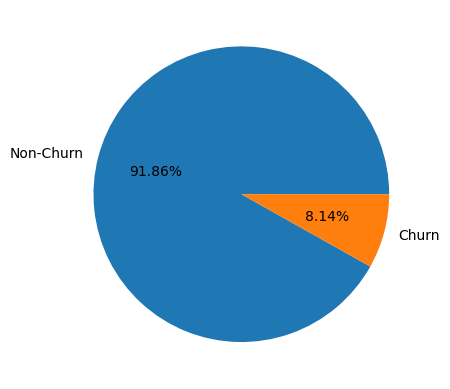

In [54]:
plt.pie(round(telecom_high_value['Churn'].value_counts()/len(telecom_high_value.index)*100,2),labels=['Non-Churn','Churn'],autopct='%1.2f%%')
plt.show()

###### Obsevation:<br>
    1) Churn percentage is a little more than 8%
    2) There is class imbalance
    

In [55]:
# Converting Age on Network (Days to Month)
telecom_high_value['Tenure_in_months']=telecom_high_value['aon']/30
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,Tenure_in_months
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,32.266667
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1,26.733333
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,

In [56]:
#Creating Bins for the Month Created
telecom_high_value['tenure_range'] = pd.cut(telecom_high_value['Tenure_in_months'], [0, 6, 12, 24, 60, 61], labels=[ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'])
telecom_high_value=telecom_high_value.drop(['Tenure_in_months'],axis=1)
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,tenure_range
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,2-5 Yrs
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1,2-5 Yrs
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.0

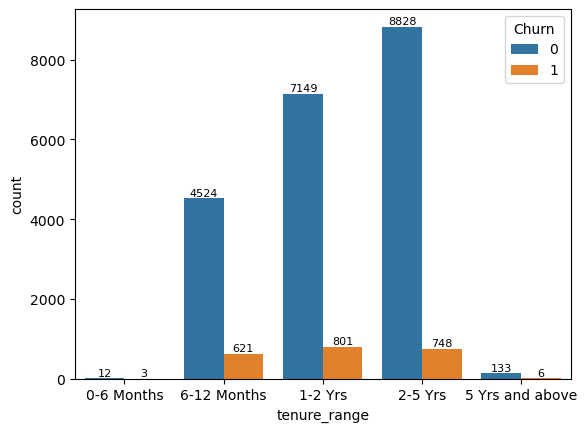

In [57]:
#Plot to understand the Churn accoring to bins created
plots=sns.countplot(x='tenure_range',hue='Churn',data=telecom_high_value)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 4),
                   textcoords='offset points')

plt.show()



In [58]:
telecom_high_value=telecom_high_value.drop(['tenure_range'],axis=1)
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437

In [59]:
telecom_rec_columns=telecom_high_value.columns[telecom_high_value.columns.str.contains('rech_amt|rech_data')]
telecom_rec_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')

In [60]:
# Defining Box Plot
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = telecom_high_value
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Churn",showfliers=False)
    plt.ylim(-200,1750)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Churn",showfliers=False)
    plt.ylim(-200,1750)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Churn",showfliers=False)
    plt.ylim(-200,1750)
    plt.legend(loc='best')
    plt.show()

In [61]:
# Defining bar Plot-Median
def plot_bar_chart_median(attribute):
    telecom_high_value.groupby('Churn')[attribute+"_6",attribute+"_7",attribute+"_8"].median().plot.bar(figsize=[6,5])
    plt.tick_params(size=5,labelsize = 15) 
    plt.title(attribute+' ''in  month 6,7,8',fontsize=15)
    plt.ylabel("median",fontsize=15)
    plt.xlabel("Churn type",fontsize=15)
    plt.grid(0.3)
    plt.show()

In [62]:
# Defining bar Plot-Mean
def plot_bar_chart_mean(attribute):
    telecom_high_value.groupby('Churn')[attribute+"_6",attribute+"_7",attribute+"_8"].mean().plot.bar(figsize=[6,5])
    plt.tick_params(size=5,labelsize = 15) 
    plt.title(attribute+' ''in  month 6,7,8',fontsize=15)
    plt.ylabel("mean",fontsize=15)
    plt.xlabel("Churn type",fontsize=15)
    plt.grid(0.3)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


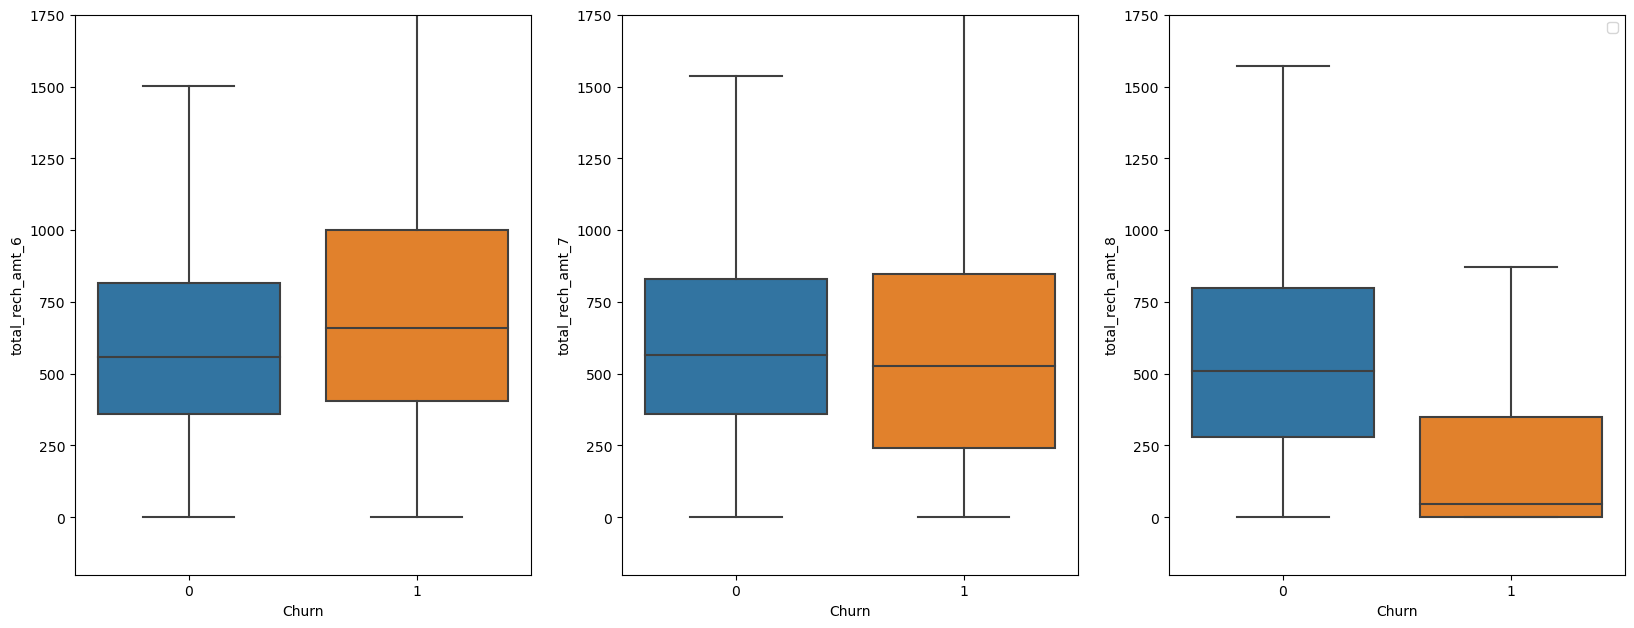

In [63]:
# Box Plot trend of Rechage amount for 6,7,8
plot_box_chart('total_rech_amt')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


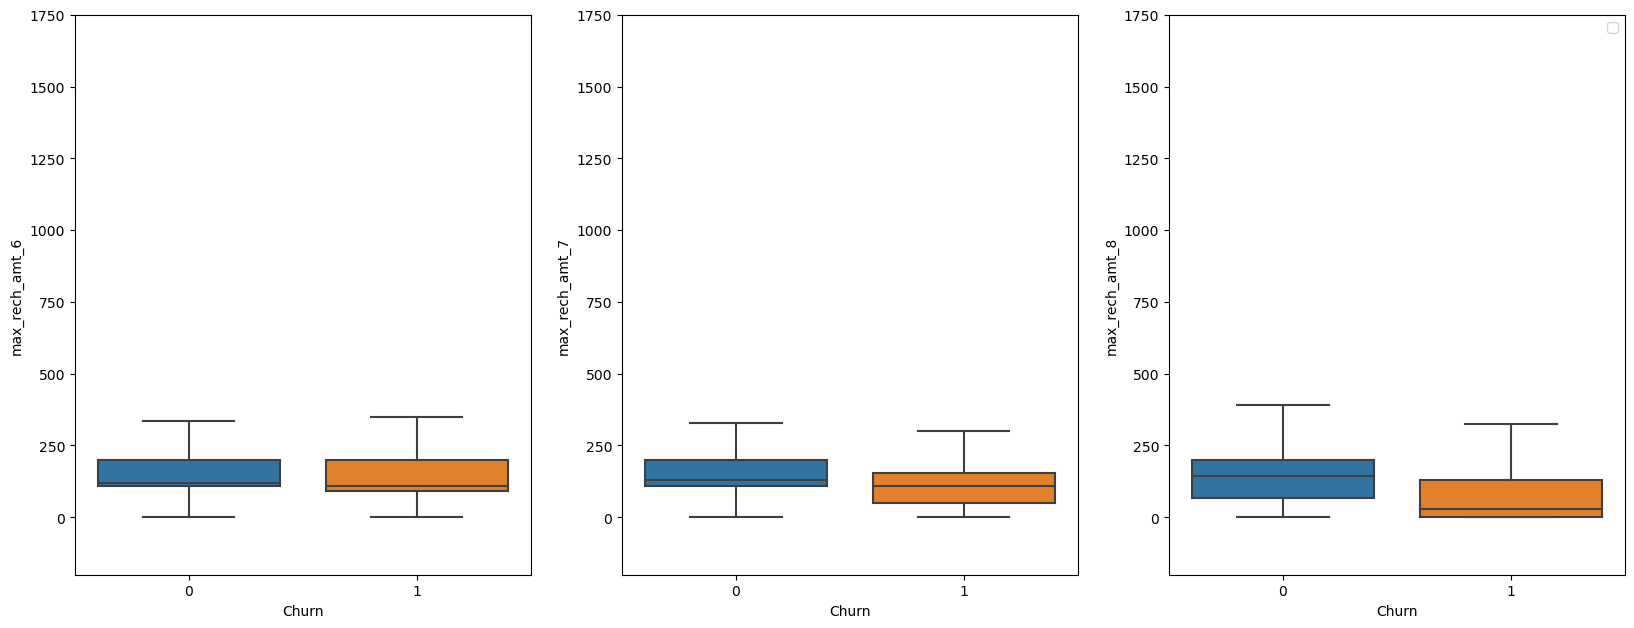

In [64]:
# Box Plot trend of max Rechage amount for 6,7,8
plot_box_chart('max_rech_amt')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


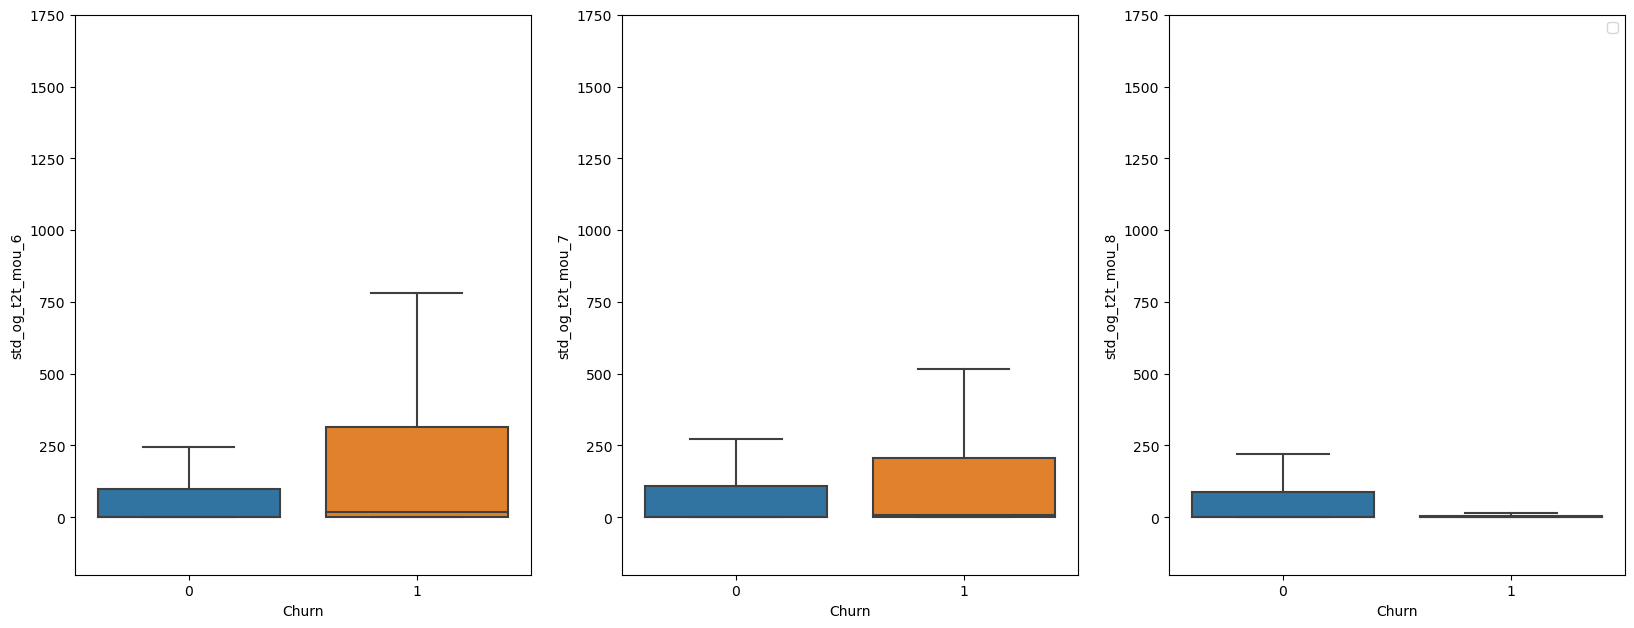

In [65]:
# Box Plot trend of STD Outgoing Minutes from T2T for 6,7,8
plot_box_chart('std_og_t2t_mou')

###### Obsevation:<br>
    1)Decrease in Total recharge amount of a customer in the 8th month is strong indication of Churn
    

In [66]:
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437

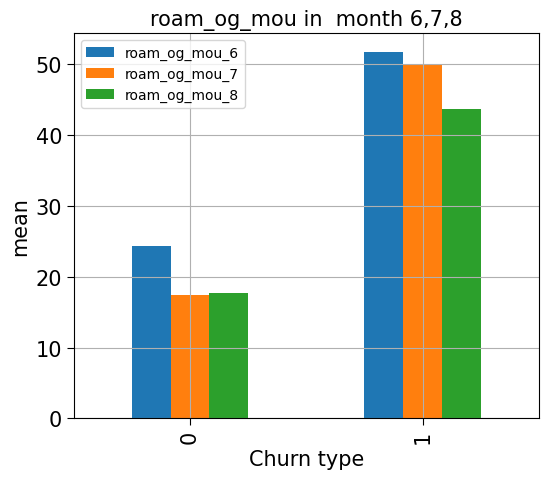

In [67]:
# Bar Plot trend of Roam Outgoing Minutes for 6,7,8
plot_bar_chart_mean('roam_og_mou')

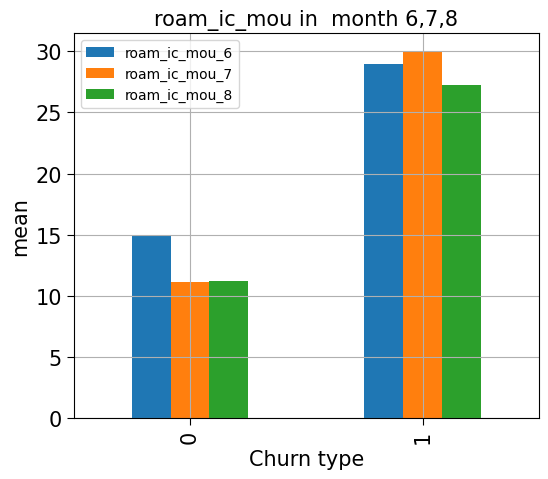

In [68]:
# Bar Plot trend of Roam incoming Minutes for 6,7,8
plot_bar_chart_mean('roam_ic_mou')

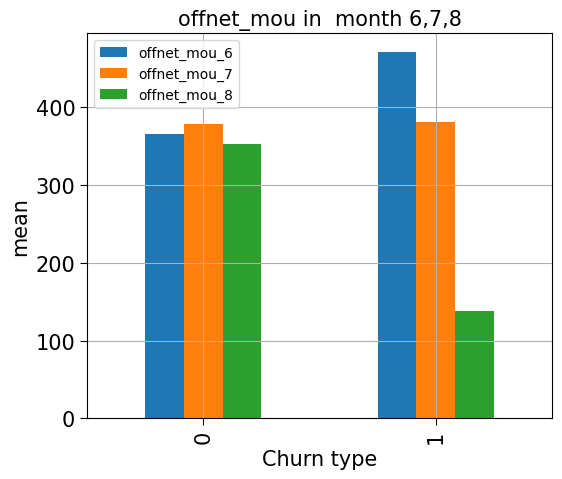

In [69]:
# Minutes of usage outside the operator T network for 6 7 & 8
plot_bar_chart_mean('offnet_mou')

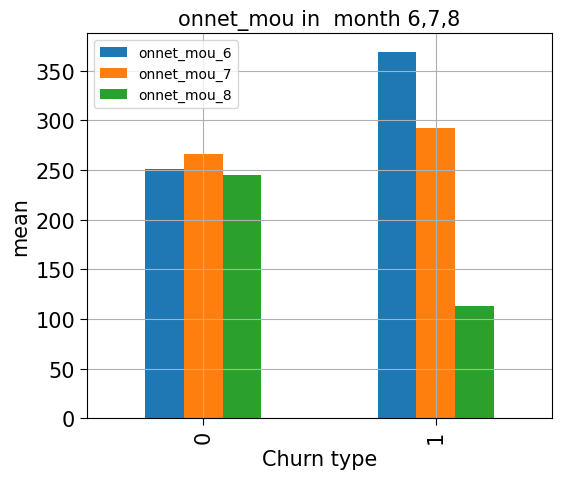

In [70]:
# Minutes of usage Within the operator T network for 6 7 & 8
plot_bar_chart_mean('onnet_mou')

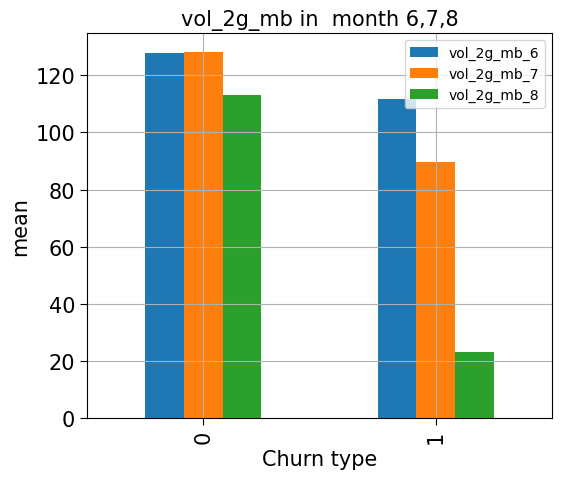

In [71]:
# 2G VOl in MB For 6 7 & 8
plot_bar_chart_mean('vol_2g_mb')

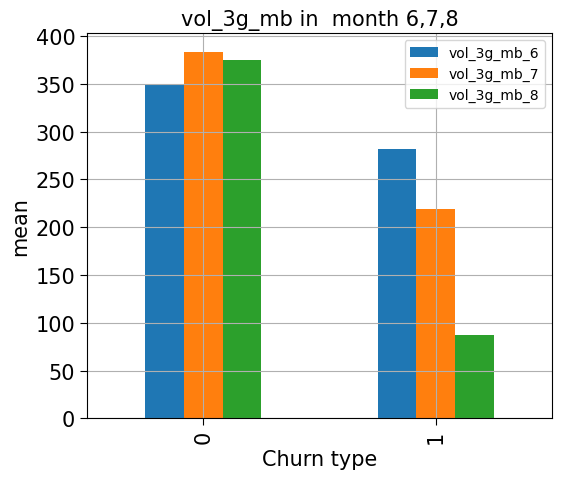

In [72]:
# 3G VOl in MB For 6 7 & 8
plot_bar_chart_mean('vol_3g_mb')

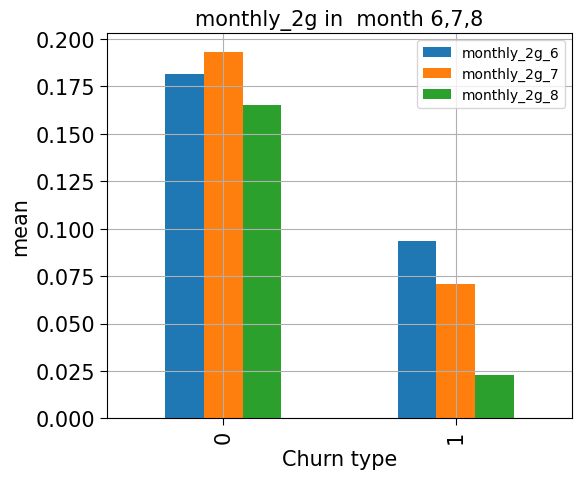

In [73]:
# Monthly 2G
plot_bar_chart_mean('monthly_2g')

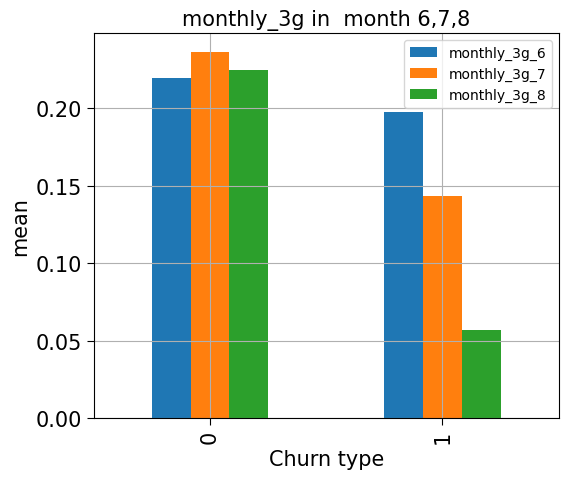

In [74]:
# Monthly 3G 
plot_bar_chart_mean('monthly_3g')

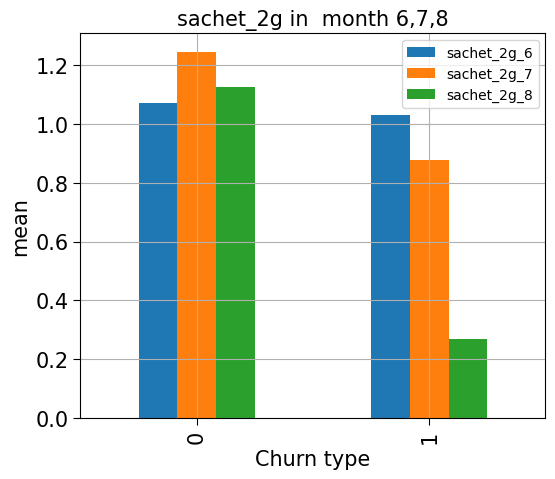

In [75]:
plot_bar_chart_mean('sachet_2g')

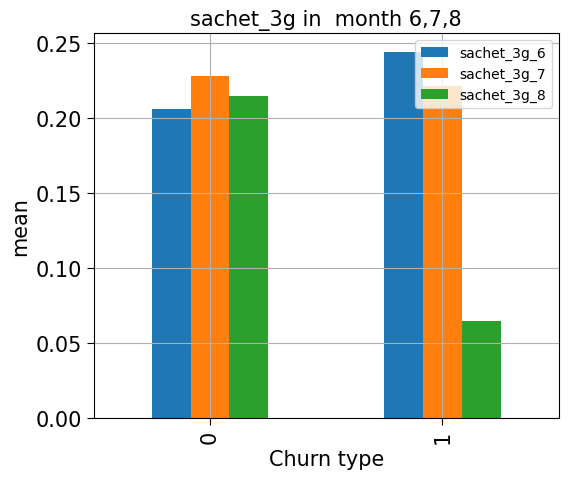

In [76]:
plot_bar_chart_mean('sachet_3g')

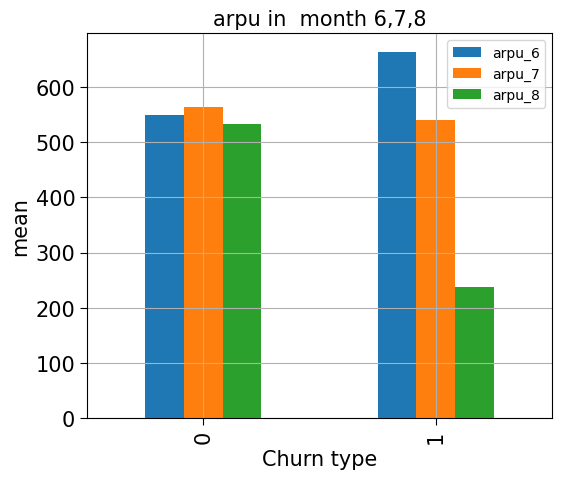

In [77]:
#Avg rev per User
plot_bar_chart_mean('arpu')

###### Observation:<br>
    1)Decrease in 2G/3G Data service is strong indicator of Chrun.
    2)Decrease in mean Minitues of usage be it within or outside the T nerwork is strong indicator of Chrun.
    3)Higher Roaming Minitues of usage in Incoming and outgoing than normal is strong indicator of Chrun. 
    4)Decrease in Avg Revenue per User is a strong indicator of Chrun.

In [78]:
telecom_high_value.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0,-1.0,-1.0,802,57.74,19.38,18.74,0.00,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437

In [79]:
# For a few columns we had inputed -1 for missing value. For those columns we are we are replacing 0.1 & -1 by there mean values in there respective columns
print(telecom_high_value.groupby('night_pck_user_6')["Churn"].mean())
print(telecom_high_value.groupby('night_pck_user_7')["Churn"].mean())
print(telecom_high_value.groupby('night_pck_user_8')["Churn"].mean())
print(telecom_high_value.groupby('fb_user_6')["Churn"].mean())
print(telecom_high_value.groupby('fb_user_7')["Churn"].mean())
print(telecom_high_value.groupby('fb_user_8')["Churn"].mean())

night_pck_user_6
-1.0    0.098754
 0.0    0.066977
 1.0    0.093366
Name: Churn, dtype: float64
night_pck_user_7
-1.0    0.114802
 0.0    0.055869
 1.0    0.061333
Name: Churn, dtype: float64
night_pck_user_8
-1.0    0.141088
 0.0    0.028824
 1.0    0.026393
Name: Churn, dtype: float64
fb_user_6
-1.0    0.098754
 0.0    0.077173
 1.0    0.066860
Name: Churn, dtype: float64
fb_user_7
-1.0    0.114802
 0.0    0.065918
 1.0    0.055146
Name: Churn, dtype: float64
fb_user_8
-1.0    0.141088
 0.0    0.067683
 1.0    0.024314
Name: Churn, dtype: float64


In [80]:
# Map each categorical value with mean value
mapping = {'night_pck_user_6' : {-1: 0.098754, 0: 0.066977, 1: 0.093366},
           'night_pck_user_7' : {-1: 0.114802, 0: 0.055869, 1: 0.061333},
           'night_pck_user_8' : {-1: 0.141088, 0: 0.028824, 1: 0.026393},
           'fb_user_6'        : {-1: 0.098754, 0: 0.077173, 1: 0.066860},
           'fb_user_7'        : {-1: 0.114802, 0: 0.065918, 1: 0.055146},
           'fb_user_8'        : {-1: 0.141088, 0: 0.067683, 1: 0.024314}}

In [81]:
telecom_high_value.replace(mapping, inplace = True)

###### Test-Train Split

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
# Creating X & y for test and train data
X=telecom_high_value.drop(['Churn','mobile_number'],axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.066977,0.055869,0.028824,0,0,0,0,0,0,1,1,1,0,0,0,0.066860,0.055146,0.024314,968,30.40,0.00,101.20,3.58
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.098754,0.114802,0.141088,0,0,0,0,0,0,0,0,0,0,0,0,0.098754,0.114802,0.141088,802,57.74,19.38,18.74,0.00
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,60

In [84]:
# Defining y
y=telecom_high_value['Churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [85]:
# Test & Train Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=100,stratify=y)

In [86]:
X_train.shape,X_test.shape

((21000, 140), (9001, 140))

In [87]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
81898,271.831,199.033,393.619,2.09,2.03,3.63,111.39,53.43,115.46,0.00,0.0,0.00,0.00,0.0,0.00,2.09,2.03,3.63,110.28,41.83,107.13,0.00,7.23,4.51,0.00,4.36,0.0,112.38,51.09,115.28,0.00,0.00,0.00,0.00,0.00,1.13,1.11,0.00,2.68,1.11,0.00,3.81,0.0,0.00,0.0,0.00,4.36,0.00,0.00,0.0,0.0,113.49,55.46,119.09,8.39,0.71,11.04,165.34,232.73,461.88,16.43,48.66,49.14,190.18,282.11,522.08,0.00,0.00,0.00,0.00,1.01,39.99,10.81,3.21,14.28,10.81,4.23,54.28,200.99,286.34,576.36,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,7,6,6,352,232,484,152,152,152,50,50,152,2.0,2.0,4.0,152.0,152.0,152.0,304.0,304.0,608.0,45.99,70.75,97.89,477.71,571.4,631.48,0.066977,0.055869,0.028824,0,0,0,1,1,2,0,0,0,1,1,2,0.066860,0.055146,0.024314,2860,492.59,625.33,486.54,0.0
33489,337.141,348.726,285.105,111.68,284.11,144.29,60.78,125.28,134.38,52.16,0.0,0.00,45.79,0.0,0.00,6.04,40.09,83.24,6.99,41.51,70.38,0.00,1.35,2.03,0.00,12.36,0.0,13.04,82.96,155.66,87.28,244.01,61.04,29.13,64.48,61.96,0.00,0.00,0.00,116.41,308.49,123.01,0.0,0.00,0.0,1.36,22.36,1.19,0.00,0.0,0.0,130.83,413.83,279.88,12.94,44.38,18.59,16.71,26.13,39.46,0.00,1.93,12.31,29.66,72.44,70.38,7.79,0.61,2.38,0.91,2.31,3.34,0.00,0.00,0.00,8.71,2.93,5.73,38.84,75.78,76.44,0.0,0.4,0.25,0.00,0.00,0.0,0.46,0.0,0.08,11,8,6,392,471,307,110,128,130,110,67,67,4.0,1.0,1.0,25.0,56.0,23.0,100.0,56.0,23.0,219.97,248.88,2.54,0.00,0.0,0.00,0.066977,0.055869,0.028824,0,0,0,3,1,1,0,0,0,1,0,0,0.066860,0.055146,0.024314,440,0.00,0.00,0.00,0.0
21296,569.597,837.682,668.214,300.36,323.21,302.56,486.24,404.33,554.08,0.00,0.0,0.00,0.00,0.0,0.00,279.24,314.94,300.98,431.99,351.38,473.18,16.23,22.06,13.81,0.00,0.00,0.0,727.48,688.39,787.98,21.11,8.26,1.58,36.71,28.79,67.08,0.00,2.08,0.00,57.83,39.14,68.66,0.8,6.33,0.0,0.50,0.00,0.00,0.00,0.0,0.0,786.61,733.88,856.64,234.88,208.98,197.71,575.29,397.21,397.26,37.86,17.83,10.54,848.04,624.03,605.53,30.74,35.23,0.00,36.96,59.31,45.24,4.88,1.10,0.00,72.59,95.64,45.24,935.93,725.38,651.86,0.0,0.0,0.00

In [88]:
# Install Required library
! pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [89]:
# Install Required library
!pip install --user imblearn

In [90]:
# Installing a downgrade for SMOTE
!pip install scikit-learn==1.2.2

Defaulting to user installation because normal site-packages is not writeable


In [91]:
# As there is Class imbalance using SMOTE technique to balance out the target value
from imblearn.over_sampling import SMOTE

In [92]:
# Using SMTE technique to balance the target value
smote=SMOTE(random_state=42)
X_resampled_sm,y_resampled_sm= smote.fit_resample(X_train,y_train)

In [93]:
X_resampled_sm.shape,y_resampled_sm.shape

((38582, 140), (38582,))

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
# Selecting the variable to be scaled
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_resampled_sm)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [96]:
# scaled Train data
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.084380,0.059556,0.038836,0.000298,0.000249,0.000338,0.016594,0.006425,0.008243,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000325,0.000283,0.000338,0.023316,0.009179,0.021593,0.000000,0.006834,0.004857,0.00000,0.007653,0.0,0.010559,0.006827,0.010442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000081,0.001766,0.000000,0.005185,0.000151,0.000000,0.000273,0.000000,0.000000,0.0,0.000000,0.003444,0.000000,0.000000,0.0,0.0,0.010632,0.006660,0.008480,0.001321,0.000124,0.002758,0.035225,0.055790,0.099468,0.009789,0.034929,0.037525,0.025512,0.043625,0.096884,0.000000,0.000000,0.000000,0.000000,0.000326,0.007083,0.008001,0.002826,0.010237,0.001980,0.000729,0.009112,0.026048,0.038472,0.095005,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022801,0.043478,0.030612,0.010003,0.005752,0.010680,0.037905,0.037905,0.034165,0.012469,0.012469,0.034165,0.032787,0.04,0.066667,0.097749,0.097749,0.097749,0.040286,0.080744,0.195498,0.004471,0.010471,0.008805,0.017808,0.020303,0.021296,0.0,0.0,0.021195,0.00,0.0,0.0,0.023810,0.028571,0.045455,0.0,0.0,0.0,0.034483,0.030303,0.04878,0.0,0.0,0.0,0.647187,0.038137,0.068226,0.043573,0.0
1,0.086558,0.063584,0.035690,0.015929,0.034827,0.013419,0.009054,0.015064,0.009594,0.020146,0.0,0.000000,0.014482,0.0,0.000000,0.000939,0.005597,0.007741,0.001478,0.009109,0.014186,0.000000,0.001276,0.002186,0.00000,0.021695,0.0,0.001225,0.011086,0.014100,0.012491,0.030000,0.008189,0.004737,0.007795,0.004442,0.000000,0.000000,0.000000,0.015854,0.037293,0.008799,0.000000,0.000000,0.0,0.001329,0.017665,0.001247,0.000000,0.0,0.0,0.012257,0.049692,0.019930,0.002037,0.007773,0.004644,0.003560,0.006264,0.008498,0.000000,0.001385,0.009400,0.003979,0.011202,0.013061,0.001427,0.000105,0.000552,0.000197,0.000745,0.000592,0.000000,0.000000,0.000000,0.001595,0.000505,0.000962,0.005034,0.010182,0.012600,0.0,0.029718,0.198413,0.000000,0.000000,0.0,0.000342,0.000000,0.000066,0.035831,0.057971,0.030612,0.011140,0.01

In [97]:
X_train_scaled.shape

(38582, 140)

In [98]:
# Scaling the test data
X_test_scaled=scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [99]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.079260,0.062567,0.044453,0.000232,0.006151,0.010877,0.003890,0.001919,0.010310,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000253,0.007005,0.010877,0.003833,0.002069,0.028821,0.002380,0.000000,0.000000,0.023431,0.011462,0.004648,0.002009,0.007966,0.023547,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.008297,0.013185,0.005584,0.006953,0.0,0.0,0.003197,0.009163,0.018891,0.001825,0.039357,0.080083,0.019662,0.033120,0.032945,0.002580,0.002864,0.016899,0.014518,0.056733,0.091990,0.000000,0.000329,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000329,0.000000,0.014026,0.049550,0.081711,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.042345,0.217391,0.224490,0.003751,0.008727,0.014960,0.004239,0.006234,0.022477,0.004239,0.006234,0.006743,0.065574,0.22,0.166667,0.010932,0.016077,0.016077,0.008216,0.070916,0.080386,0.034899,0.022546,0.015279,0.002517,0.000605,0.001966,0.0,0.0,0.021195,0.0,0.0,0.0,0.095238,0.200000,0.181818,0.000000,0.0000,0.0,0.0,0.121212,0.04878,0.0,0.0,0.0,0.207679,0.004652,0.000000,0.000000,0.001051
1,0.098694,0.071187,0.042137,0.097599,0.080560,0.040040,0.072850,0.050714,0.027009,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.106398,0.091745,0.040040,0.102065,0.090798,0.073077,0.001271,0.007543,0.000388,0.000000,0.000000,0.020207,0.109729,0.144187,0.071872,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.005287,0.000000,0.016134,0.000000,0.0,0.0,0.109922,0.129560,0.057599,0.002336,0.005146,0.005006,0.070530,0.111300,0.052876,0.069030,0.043780,0.071653,0.061945,0.085774,0.066696,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.059856,0.074525,0.059244,0.004049,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.042345,0.094203,0.076531,0.021256,0.019090,0.012467,0.029925,0.029925,0.022027,0.007481,0.0

###### Logistic Regression Using PCA-Principal Component Analysis

In [100]:
# importing PCA
from sklearn.decomposition import PCA

In [101]:
# Defining PCA without dimension/components
pca =PCA(random_state=42)

In [102]:
# fitting PCA to the Scaled data
x_train_pca=pca.fit(X_train_scaled)

In [103]:
var_cum = np.cumsum(x_train_pca.explained_variance_ratio_)

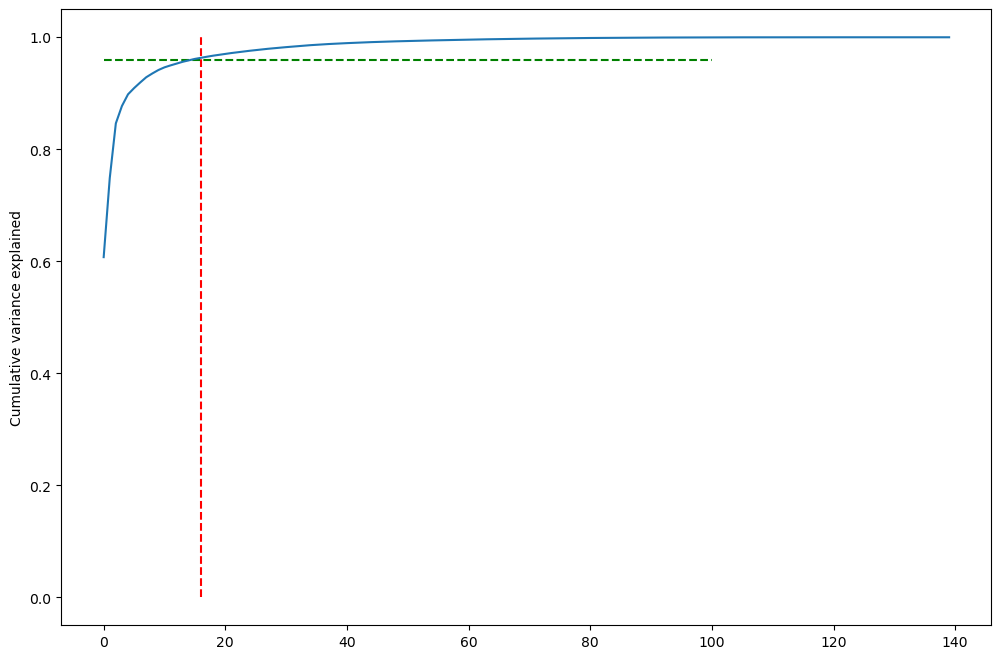

In [104]:
# Identying how many components would explain 96% of variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=16, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [105]:
# Cummulative sum wrt to dimension
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([60.7, 74.8, 84.6, 87.7, 89.8, 90.9, 91.9, 92.8, 93.5, 94.1, 94.6,
       95. , 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. , 97.2, 97.4,
       97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3, 98.4, 98.5,
       98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2,
       99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2, 99.2])

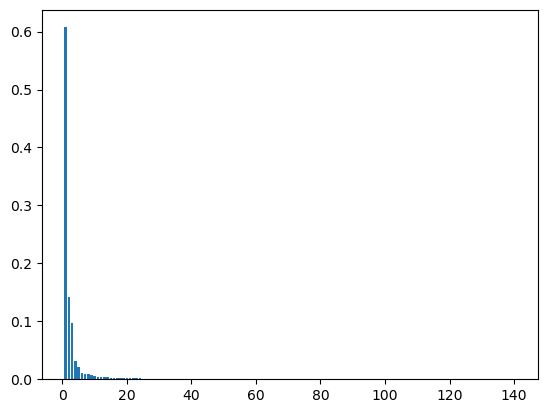

In [106]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

In [107]:
# Defining PCA With dimension/components
pca_final=PCA(n_components=16,random_state=42)

In [108]:
# Training the PCA model on X_train
X_train_pca_final = pca_final.fit_transform(X_train_scaled)

In [109]:
X_test_pca_final=pca_final.transform(X_test_scaled)

In [110]:
X_train_pca_final.shape,X_test_pca_final.shape

((38582, 16), (9001, 16))

In [111]:
from sklearn.linear_model import LogisticRegression 

In [112]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [113]:
# Defining Logestic Regtression and training it on X_train
logreg=LogisticRegression()
logreg.fit(X_train_pca_final,y_resampled_sm)

LogisticRegression()

In [114]:
y_pred_Log=logreg.predict(X_test_pca_final)

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
#Cross validation score
cv_score = cross_val_score(logreg, X_train,y_train, cv=5)
cv_score

array([0.93119048, 0.92428571, 0.93357143, 0.93      , 0.93452381])

In [117]:
#Def Evalution metric
def evaluation_metrics(Actual, Predicted):
    print('Accuracy: ',accuracy_score(Actual, Predicted))
    print('Recall_score: ',recall_score(Actual, Predicted))
    print('Precision_score: ',precision_score(Actual, Predicted))
    print('F1_score: ',f1_score(Actual, Predicted))
    print('\n Classification_report: \n',classification_report(Actual, Predicted))
    print('\n Confusion_matrix: \n',confusion_matrix(Actual, Predicted))


In [118]:
# evaluation_metrics of Logistic Regression Using PCA
evaluation_metrics(y_test,y_pred_Log)

Accuracy:  0.7886901455393845
Recall_score:  0.7663934426229508
Precision_score:  0.24476439790575916
F1_score:  0.371031746031746

 Classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      8269
           1       0.24      0.77      0.37       732

    accuracy                           0.79      9001
   macro avg       0.61      0.78      0.62      9001
weighted avg       0.92      0.79      0.83      9001


 Confusion_matrix: 
 [[6538 1731]
 [ 171  561]]


###### Observation:
    Accuracy:  0.79
    Recall:  0.77
    specificity:0.79
    

###### Random Forest

In [119]:
# import libraries relating to Random Forest
from sklearn.ensemble import RandomForestClassifier

###### Default Hyperparameters

In [120]:
# Initializing Random forest with Default hyperparameters 
rf=RandomForestClassifier(random_state=42,n_jobs=-1,oob_score=True)

In [121]:
rf.fit(X_train_scaled,y_resampled_sm)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

###### Setting Hyperparameters

In [122]:
# Setting Hyperparameter for Radomized SearchCV
hyper_params= {'max_depth':range(3,100),
       'min_samples_leaf':range(15,100),
        'max_features': range(10,40),
        'n_estimators':range(10,100)}

In [123]:
from sklearn.model_selection import RandomizedSearchCV

In [124]:
#Grid_search=RandomizedSearchCV(estimator=rf,param_distributions=hyper_params,cv=4,n_jobs=-1,verbose=1,return_train_score=True,n_iter=10)

In [125]:
#Grid_search.fit(X_train_scaled,y_resampled_sm)

In [126]:
#rf_best=Grid_search.best_estimator_
#rf_best

Please Note the Seach grid has commented out for faster execution

In [127]:
# Best Estimator selected using RandomizedSearchCV
rf_best=RandomForestClassifier(max_depth=27, max_features=17, min_samples_leaf=15,
                       n_estimators=86, n_jobs=-1, oob_score=True,
                       random_state=42)

RandomForestClassifier(max_depth=27, max_features=17, min_samples_leaf=15,
                       n_estimators=86, n_jobs=-1, oob_score=True,
                       random_state=42)

In [128]:
#Grid_search.best_score_

In [129]:
# Fitting Best Estimator to train the model
rf_best=rf_best.fit(X_train_scaled,y_resampled_sm)

In [130]:
# Prediction on test set
y_test_pred_rf=rf_best.predict(X_test_scaled)

In [131]:
accuracy_score(y_test, y_test_pred_rf)

0.9216753694033997

In [132]:
# evaluation_metrics of Random Forest
evaluation_metrics(y_test, y_test_pred_rf)

Accuracy:  0.9216753694033997
Recall_score:  0.6939890710382514
Precision_score:  0.5136501516683518
F1_score:  0.5903544450900637

 Classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      8269
           1       0.51      0.69      0.59       732

    accuracy                           0.92      9001
   macro avg       0.74      0.82      0.77      9001
weighted avg       0.93      0.92      0.93      9001


 Confusion_matrix: 
 [[7788  481]
 [ 224  508]]


In [133]:
Imp_matrics=pd.DataFrame({'Feature_name': X_test_scaled.columns,'Importance':rf.feature_importances_})

In [134]:
Imp_matrics.sort_values(by='Importance',ascending=False)

,Feature_name,Importance
65,loc_ic_mou_8,0.066852
80,total_ic_mou_8,0.047319
119,night_pck_user_8,0.045073
95,total_rech_amt_8,0.044757
14,roam_og_mou_8,0.039710
11,roam_ic_mou_8,0.038618
134,fb_user_8,0.038343
59,loc_ic_t2m_mou_8,0.037760
56,loc_ic_t2t_mou_8,0.037057
101,last_day_rch_amt_8,0.028338


###### Decision Tree

In [135]:
# import libraries relating to Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [136]:
# Initializing Decision Tree with Default hyperparameters & Fitting to train the model
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled,y_resampled_sm)

DecisionTreeClassifier(random_state=42)

In [137]:
# Prediction on test set
y_pred_dt=dt.predict(X_test_scaled)

In [138]:
# evaluation_metrics of Decision Tree
evaluation_metrics(y_test,y_pred_dt)

Accuracy:  0.884457282524164
Recall_score:  0.5846994535519126
Precision_score:  0.36769759450171824
F1_score:  0.4514767932489452

 Classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      8269
           1       0.37      0.58      0.45       732

    accuracy                           0.88      9001
   macro avg       0.66      0.75      0.69      9001
weighted avg       0.91      0.88      0.90      9001


 Confusion_matrix: 
 [[7533  736]
 [ 304  428]]


###### Logistic Regression With RFE

In [139]:
# import libraries relating to Logistic Regression with RFE
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [140]:
# Feature Scaling
scaler=MinMaxScaler()
X_train_scale=scaler.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale,columns=X_train.columns)
X_train_scale.shape

(21000, 140)

In [141]:
X_test_scale=scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scale.shape

(9001, 140)

In [142]:
log_reg=LogisticRegression()

In [143]:
# Selceting top 15 features using RFE
rfe=RFE(log_reg,n_features_to_select=15)

In [144]:
rfe=rfe.fit(X_train_scale,y_train)

In [145]:
# Top 15 Feature that is selected
req_cols=X_train_scale.columns[rfe.support_]

req_cols

Index(['loc_og_t2m_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'total_og_mou_6',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'monthly_2g_8',
       'sachet_2g_8'],
      dtype='object')

In [146]:
X_resampled_sm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,271.831,199.033,393.619,2.09,2.03,3.63,111.39,53.43,115.46,0.00,0.0,0.00,0.00,0.0,0.00,2.09,2.03,3.63,110.28,41.83,107.13,0.00,7.23,4.51,0.00,4.36,0.0,112.38,51.09,115.28,0.00,0.00,0.00,0.00,0.00,1.13,1.11,0.00,2.68,1.11,0.00,3.81,0.0,0.00,0.0,0.00,4.36,0.00,0.00,0.0,0.0,113.49,55.46,119.09,8.39,0.71,11.04,165.34,232.73,461.88,16.43,48.66,49.14,190.18,282.11,522.08,0.00,0.00,0.00,0.00,1.01,39.99,10.81,3.21,14.28,10.81,4.23,54.28,200.99,286.34,576.36,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,7,6,6,352,232,484,152,152,152,50,50,152,2.0,2.0,4.0,152.0,152.0,152.0,304.0,304.0,608.0,45.99,70.75,97.89,477.71,571.4,631.48,0.066977,0.055869,0.028824,0,0,0,1,1,2,0,0,0,1,1,2,0.066860,0.055146,0.024314,2860,492.59,625.33,486.54,0.0
1,337.141,348.726,285.105,111.68,284.11,144.29,60.78,125.28,134.38,52.16,0.0,0.00,45.79,0.0,0.00,6.04,40.09,83.24,6.99,41.51,70.38,0.00,1.35,2.03,0.00,12.36,0.0,13.04,82.96,155.66,87.28,244.01,61.04,29.13,64.48,61.96,0.00,0.00,0.00,116.41,308.49,123.01,0.0,0.00,0.0,1.36,22.36,1.19,0.00,0.0,0.0,130.83,413.83,279.88,12.94,44.38,18.59,16.71,26.13,39.46,0.00,1.93,12.31,29.66,72.44,70.38,7.79,0.61,2.38,0.91,2.31,3.34,0.00,0.00,0.00,8.71,2.93,5.73,38.84,75.78,76.44,0.0,0.4,0.25,0.00,0.00,0.0,0.46,0.0,0.08,11,8,6,392,471,307,110,128,130,110,67,67,4.0,1.0,1.0,25.0,56.0,23.0,100.0,56.0,23.0,219.97,248.88,2.54,0.00,0.0,0.00,0.066977,0.055869,0.028824,0,0,0,3,1,1,0,0,0,1,0,0,0.066860,0.055146,0.024314,440,0.00,0.00,0.00,0.0
2,569.597,837.682,668.214,300.36,323.21,302.56,486.24,404.33,554.08,0.00,0.0,0.00,0.00,0.0,0.00,279.24,314.94,300.98,431.99,351.38,473.18,16.23,22.06,13.81,0.00,0.00,0.0,727.48,688.39,787.98,21.11,8.26,1.58,36.71,28.79,67.08,0.00,2.08,0.00,57.83,39.14,68.66,0.8,6.33,0.0,0.50,0.00,0.00,0.00,0.0,0.0,786.61,733.88,856.64,234.88,208.98,197.71,575.29,397.21,397.26,37.86,17.83,10.54,848.04,624.03,605.53,30.74,35.23,0.00,36.96,59.31,45.24,4.88,1.10,0.00,72.59,95.64,45.24,935.93,725.38,651.86,0.0,0.0,0.00,15.28,5.69,

In [147]:
scaler=MinMaxScaler()
X_resampled_sm=scaler.fit_transform(X_resampled_sm)
X_resampled_sm = pd.DataFrame(X_resampled_sm,columns=X_train.columns)
X_resampled_sm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.084380,0.059556,0.038836,0.000298,0.000249,0.000338,0.016594,0.006425,0.008243,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000325,0.000283,0.000338,0.023316,0.009179,0.021593,0.000000,0.006834,0.004857,0.00000,0.007653,0.0,0.010559,0.006827,0.010442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000081,0.001766,0.000000,0.005185,0.000151,0.000000,0.000273,0.000000,0.000000,0.0,0.000000,0.003444,0.000000,0.000000,0.0,0.0,0.010632,0.006660,0.008480,0.001321,0.000124,0.002758,0.035225,0.055790,0.099468,0.009789,0.034929,0.037525,0.025512,0.043625,0.096884,0.000000,0.000000,0.000000,0.000000,0.000326,0.007083,0.008001,0.002826,0.010237,0.001980,0.000729,0.009112,0.026048,0.038472,0.095005,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.022801,0.043478,0.030612,0.010003,0.005752,0.010680,0.037905,0.037905,0.034165,0.012469,0.012469,0.034165,0.032787,0.04,0.066667,0.097749,0.097749,0.097749,0.040286,0.080744,0.195498,0.004471,0.010471,0.008805,0.017808,0.020303,0.021296,0.0,0.0,0.021195,0.00,0.0,0.0,0.023810,0.028571,0.045455,0.0,0.0,0.0,0.034483,0.030303,0.04878,0.0,0.0,0.0,0.647187,0.038137,0.068226,0.043573,0.0
1,0.086558,0.063584,0.035690,0.015929,0.034827,0.013419,0.009054,0.015064,0.009594,0.020146,0.0,0.000000,0.014482,0.0,0.000000,0.000939,0.005597,0.007741,0.001478,0.009109,0.014186,0.000000,0.001276,0.002186,0.00000,0.021695,0.0,0.001225,0.011086,0.014100,0.012491,0.030000,0.008189,0.004737,0.007795,0.004442,0.000000,0.000000,0.000000,0.015854,0.037293,0.008799,0.000000,0.000000,0.0,0.001329,0.017665,0.001247,0.000000,0.0,0.0,0.012257,0.049692,0.019930,0.002037,0.007773,0.004644,0.003560,0.006264,0.008498,0.000000,0.001385,0.009400,0.003979,0.011202,0.013061,0.001427,0.000105,0.000552,0.000197,0.000745,0.000592,0.000000,0.000000,0.000000,0.001595,0.000505,0.000962,0.005034,0.010182,0.012600,0.0,0.029718,0.198413,0.000000,0.000000,0.0,0.000342,0.000000,0.000066,0.035831,0.057971,0.030612,0.011140,0.01

In [148]:
X_train_scale=X_resampled_sm[req_cols]
X_train_SM=sm.add_constant(X_train_scale)
X_train_SM.shape

(38582, 16)

In [149]:
X_train_SM.head()

,const,loc_og_t2m_mou_8,loc_og_mou_8,std_og_mou_8,total_og_mou_6,total_og_mou_8,loc_ic_t2m_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,monthly_2g_8,sachet_2g_8
0,1.0,0.021593,0.010442,0.000273,0.010632,0.008480,0.099468,0.096884,0.095005,0.000000,0.030612,0.034165,0.066667,0.195498,0.0,0.045455
1,1.0,0.014186,0.014100,0.008799,0.012257,0.019930,0.008498,0.013061,0.012600,0.198413,0.030612,0.015060,0.016667,0.007395,0.0,0.022727
2,1.0,0.095374,0.071376,0.004911,0.073694,0.061001,0.085552,0.112369,0.107450,0.000000,0.035714,0.107665,0.033333,0.064952,0.0,0.022727
3,1.0,0.017860,0.008893,0.023867,0.081903,0.031196,0.024645,0.022261,0.032049,0.000000,0.030612,0.000000,0.000000,0.000000,0.0,0.000000
4,1.0,0.006115,0.003115,0.000000,0.004145,0.002449,0.033598,0.042808,0.038059,0.166667,0.045918,0.005619,0.083333,0.050161,0.0,0.113636


In [150]:
y_resampled_sm.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [151]:
# Model 1
Log_Mod1=sm.GLM(exog=X_train_SM,endog=y_resampled_sm,family=sm.families.Binomial())
Log_M1=Log_Mod1.fit()
Log_M1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15498.
Date:                Mon, 02 Oct 2023   Deviance:                       30996.
Time:                        14:24:53   Pearson chi2:                 3.34e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4417
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7817      0.027     65.257      0.000       1.728       1.835
loc_og_t2m_mou_8      -8.7555      1.389     -6.304      0.000     -11.478      -6.033
loc_og_mou_8         -12.1732      5.226     -2.330      0.020     -22.415      -1.931
std_og_mou_8          -3.7988      6.145     -0.618      0.536     -15.842       8.244
total_og_mou_6         5.9082      0.273     21.652      0.000       5.373       6.443
total_og_mou_8        -8.0984      6.166     -1.313      0.189     -20.184       3.987
loc_ic_t2m_mou_8       8.5940      2.423      3.547      0.000       3.846      13.342
loc_ic_mou_8         -23.4136      2.387     -9.810      0.000     -28.092     -18.736
total_ic_mou_8        -9.7363      1.167     -8.341      0.000     -12.024      -7.448
spl_ic_mou_8          -5.5993      0.338    -16.550      0.000      -6.262      -4.936
total_rech_num_8      -9.4343      0.524    -18.005      0.000     -10.461      -8.407
last_day_rch_amt_8   -13.8254      0.720    -19.213      0.000     -15.236     -12.415
total_rech_data_8     13.5488      1.487      9.109      0.000      10.633      16.464
av_rech_amt_data_8   -11.5962      0.534    -21.715      0.000     -12.643     -10.550
monthly_2g_8         -14.2093      0.543    -26.164      0.000     -15.274     -13.145
sachet_2g_8          -27.0930      1.233    -21.973      0.000     -29.510     -24.676
======================================================================================
"""

In [152]:
#Importing VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [153]:
# Checking VIF of the selected features by RFE
vif =pd.DataFrame()
vif['Features']= X_train_scale.columns
vif['vif']= [variance_inflation_factor(X_train_scale.values,i) for i in range (X_train_scale.shape[1])]
vif['vif']= round(vif['vif'],2)
vif =vif.sort_values(by = "vif", ascending = False)
vif

,Features,vif
4,total_og_mou_8,293.12
2,std_og_mou_8,180.68
1,loc_og_mou_8,64.44
6,loc_ic_mou_8,11.96
11,total_rech_data_8,11.25
14,sachet_2g_8,8.41
7,total_ic_mou_8,8.34
5,loc_ic_t2m_mou_8,5.73
0,loc_og_t2m_mou_8,4.45
9,total_rech_num_8,2.88


In [154]:
# Dropping total_og_mou_8 Column because of high VIF value 
req_cols=req_cols.drop(['total_og_mou_8'])

In [155]:
X_train_scale=X_resampled_sm[req_cols]
X_train_SM=sm.add_constant(X_train_scale)
X_train_SM.shape

(38582, 15)

In [156]:
# Model 2
Log_Mod2=sm.GLM(exog=X_train_SM,endog=y_resampled_sm,family=sm.families.Binomial())
Log_M2=Log_Mod2.fit()
Log_M2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38567
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15499.
Date:                Mon, 02 Oct 2023   Deviance:                       30998.
Time:                        14:24:54   Pearson chi2:                 3.38e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4417
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7830      0.027     65.384      0.000       1.730       1.836
loc_og_t2m_mou_8      -8.7578      1.389     -6.307      0.000     -11.479      -6.036
loc_og_mou_8         -18.5265      1.961     -9.447      0.000     -22.370     -14.683
std_og_mou_8         -11.8215      0.580    -20.380      0.000     -12.958     -10.685
total_og_mou_6         5.8876      0.272     21.640      0.000       5.354       6.421
loc_ic_t2m_mou_8       8.6428      2.423      3.568      0.000       3.895      13.391
loc_ic_mou_8         -23.3562      2.389     -9.776      0.000     -28.039     -18.674
total_ic_mou_8        -9.8542      1.168     -8.435      0.000     -12.144      -7.564
spl_ic_mou_8          -5.6064      0.338    -16.572      0.000      -6.269      -4.943
total_rech_num_8      -9.5146      0.521    -18.264      0.000     -10.536      -8.494
last_day_rch_amt_8   -13.8931      0.717    -19.368      0.000     -15.299     -12.487
total_rech_data_8     13.5599      1.488      9.112      0.000      10.643      16.477
av_rech_amt_data_8   -11.5946      0.534    -21.710      0.000     -12.641     -10.548
monthly_2g_8         -14.2087      0.543    -26.162      0.000     -15.273     -13.144
sachet_2g_8          -27.0952      1.233    -21.967      0.000     -29.513     -24.678
======================================================================================
"""

In [157]:
# Calculate VIF
vif =pd.DataFrame()
vif['Features']= X_train_scale.columns
vif['vif']= [variance_inflation_factor(X_train_scale.values,i) for i in range (X_train_scale.shape[1])]
vif['vif']= round(vif['vif'],2)
vif =vif.sort_values(by = "vif", ascending = False)
vif

,Features,vif
5,loc_ic_mou_8,11.96
10,total_rech_data_8,11.25
13,sachet_2g_8,8.41
6,total_ic_mou_8,8.33
4,loc_ic_t2m_mou_8,5.73
0,loc_og_t2m_mou_8,4.45
1,loc_og_mou_8,4.33
8,total_rech_num_8,2.84
11,av_rech_amt_data_8,2.29
2,std_og_mou_8,1.88


In [158]:
# Dropping loc_ic_mou_8 Column because of high VIF value 
req_cols=req_cols.drop(['loc_ic_mou_8'])

In [159]:
X_train_scale=X_resampled_sm[req_cols]
X_train_SM=sm.add_constant(X_train_scale)
X_train_SM.shape

(38582, 14)

In [160]:
# Model 3
Log_Mod3=sm.GLM(exog=X_train_SM,endog=y_resampled_sm,family=sm.families.Binomial())
Log_M3=Log_Mod3.fit()
Log_M3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38568
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15550.
Date:                Mon, 02 Oct 2023   Deviance:                       31100.
Time:                        14:24:55   Pearson chi2:                 6.14e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4402
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7719      0.027     65.108      0.000       1.719       1.825
loc_og_t2m_mou_8      -6.1796      1.463     -4.225      0.000      -9.046      -3.313
loc_og_mou_8         -24.6448      2.083    -11.831      0.000     -28.728     -20.562
std_og_mou_8         -11.5949      0.579    -20.030      0.000     -12.729     -10.460
total_og_mou_6         5.9446      0.273     21.778      0.000       5.410       6.480
loc_ic_t2m_mou_8      -8.4656      1.564     -5.414      0.000     -11.530      -5.401
total_ic_mou_8       -17.3491      1.102    -15.738      0.000     -19.510     -15.188
spl_ic_mou_8          -5.5401      0.338    -16.387      0.000      -6.203      -4.877
total_rech_num_8      -9.3818      0.521    -18.017      0.000     -10.402      -8.361
last_day_rch_amt_8   -13.9552      0.720    -19.387      0.000     -15.366     -12.544
total_rech_data_8     13.1875      1.479      8.918      0.000      10.289      16.086
av_rech_amt_data_8   -11.5255      0.533    -21.644      0.000     -12.569     -10.482
monthly_2g_8         -14.2689      0.543    -26.292      0.000     -15.333     -13.205
sachet_2g_8          -26.8168      1.225    -21.883      0.000     -29.219     -24.415
======================================================================================
"""

In [161]:
# Calculating VIF
vif =pd.DataFrame()
vif['Features']= X_train_scale.columns
vif['vif']= [variance_inflation_factor(X_train_scale.values,i) for i in range (X_train_scale.shape[1])]
vif['vif']= round(vif['vif'],2)
vif =vif.sort_values(by = "vif", ascending = False)
vif

,Features,vif
9,total_rech_data_8,11.25
12,sachet_2g_8,8.41
0,loc_og_t2m_mou_8,4.38
1,loc_og_mou_8,4.18
4,loc_ic_t2m_mou_8,4.02
5,total_ic_mou_8,3.99
7,total_rech_num_8,2.84
10,av_rech_amt_data_8,2.29
2,std_og_mou_8,1.86
3,total_og_mou_6,1.59


In [162]:
# Dropping total_rech_data_8 Column because of high VIF value 
req_cols=req_cols.drop(['total_rech_data_8'])

In [163]:
X_train_scale=X_resampled_sm[req_cols]
X_train_SM=sm.add_constant(X_train_scale)
X_train_SM.shape

(38582, 13)

In [164]:
# Model 4
Log_Mod4=sm.GLM(exog=X_train_SM,endog=y_resampled_sm,family=sm.families.Binomial())
Log_M4=Log_Mod4.fit()
Log_M4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38569
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15589.
Date:                Mon, 02 Oct 2023   Deviance:                       31179.
Time:                        14:24:55   Pearson chi2:                 6.17e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4391
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7787      0.027     65.315      0.000       1.725       1.832
loc_og_t2m_mou_8      -6.2455      1.469     -4.252      0.000      -9.124      -3.367
loc_og_mou_8         -25.1068      2.095    -11.983      0.000     -29.213     -21.000
std_og_mou_8         -11.9190      0.580    -20.568      0.000     -13.055     -10.783
total_og_mou_6         5.9524      0.273     21.817      0.000       5.418       6.487
loc_ic_t2m_mou_8      -8.2934      1.560     -5.317      0.000     -11.351      -5.236
total_ic_mou_8       -17.2963      1.100    -15.720      0.000     -19.453     -15.140
spl_ic_mou_8          -5.5288      0.338    -16.368      0.000      -6.191      -4.867
total_rech_num_8      -8.7459      0.513    -17.064      0.000      -9.750      -7.741
last_day_rch_amt_8   -14.1971      0.718    -19.784      0.000     -15.604     -12.791
av_rech_amt_data_8    -8.5256      0.390    -21.874      0.000      -9.290      -7.762
monthly_2g_8         -14.0555      0.542    -25.934      0.000     -15.118     -12.993
sachet_2g_8          -17.6926      0.650    -27.225      0.000     -18.966     -16.419
======================================================================================
"""

In [165]:
# Calculating VIF
vif =pd.DataFrame()
vif['Features']= X_train_scale.columns
vif['vif']= [variance_inflation_factor(X_train_scale.values,i) for i in range (X_train_scale.shape[1])]
vif['vif']= round(vif['vif'],2)
vif =vif.sort_values(by = "vif", ascending = False)
vif

,Features,vif
0,loc_og_t2m_mou_8,4.38
1,loc_og_mou_8,4.18
4,loc_ic_t2m_mou_8,4.02
5,total_ic_mou_8,3.99
7,total_rech_num_8,2.76
2,std_og_mou_8,1.85
3,total_og_mou_6,1.59
9,av_rech_amt_data_8,1.51
11,sachet_2g_8,1.45
8,last_day_rch_amt_8,1.36


In [166]:
X_train_SM.head()

,const,loc_og_t2m_mou_8,loc_og_mou_8,std_og_mou_8,total_og_mou_6,loc_ic_t2m_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,av_rech_amt_data_8,monthly_2g_8,sachet_2g_8
0,1.0,0.021593,0.010442,0.000273,0.010632,0.099468,0.095005,0.000000,0.030612,0.034165,0.195498,0.0,0.045455
1,1.0,0.014186,0.014100,0.008799,0.012257,0.008498,0.012600,0.198413,0.030612,0.015060,0.007395,0.0,0.022727
2,1.0,0.095374,0.071376,0.004911,0.073694,0.085552,0.107450,0.000000,0.035714,0.107665,0.064952,0.0,0.022727
3,1.0,0.017860,0.008893,0.023867,0.081903,0.024645,0.032049,0.000000,0.030612,0.000000,0.000000,0.0,0.000000
4,1.0,0.006115,0.003115,0.000000,0.004145,0.033598,0.038059,0.166667,0.045918,0.005619,0.050161,0.0,0.113636


In [167]:
# Predictng outcome test dataset
y_train_pred_Rfe = Log_M4.predict(X_train_SM)

y_train_pred_Rfe

0        0.014062
1        0.263500
2        0.003708
3        0.650333
4        0.043483
           ...   
38577    0.818217
38578    0.196681
38579    0.836719
38580    0.939306
38581    0.915123
Length: 38582, dtype: float64

In [168]:
# Reshapping the predicted outcome
y_train_pred_Rfe=y_train_pred_Rfe.values.reshape(-1)

In [169]:
# Creating Dataframe to compare the predicted outcome and the actual outcome
y_train_pred_final = pd.DataFrame({'Converted':y_resampled_sm.values, 'Converted_prob':y_train_pred_Rfe})

y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.014062
1,0,0.263500
2,0,0.003708
3,0,0.650333
4,0,0.043483


In [170]:

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final

,Converted,Converted_prob,Predicted
0,0,0.014062,0
1,0,0.263500,0
2,0,0.003708,0
3,0,0.650333,1
4,0,0.043483,0
...,...,...,...
38577,1,0.818217,1
38578,1,0.196681,0
38579,1,0.836719,1
38580,1,0.939306,1


In [171]:
from sklearn import metrics

In [172]:
# accuracy Score calucation for selected thershold of 0.5
accuracy=metrics.accuracy_score(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

print(accuracy)

0.8237520087087242


In [173]:
# confusion matrix Score calucation for selected thershold of 0.5
confusion=metrics.confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

print(confusion)

[[15187  4104]
 [ 2696 16595]]


In [174]:
TN=confusion[0,0] #True Negative
FP=confusion[0,1] #False Positive
FN=confusion[1,0] #False Negative
TP=confusion[1,1] #True Positive

In [175]:
# sensitivity Score calucation for selected threshold of 0.5

sensitivity=TP/float(FN+TP)

print(sensitivity)

0.8602457104349178


In [176]:
# specificity Score calucation for selected threshold of 0.5

specificity =TN/float(TN+FP)

print(specificity)

0.7872583069825307


In [177]:
# Drawing ROC Curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

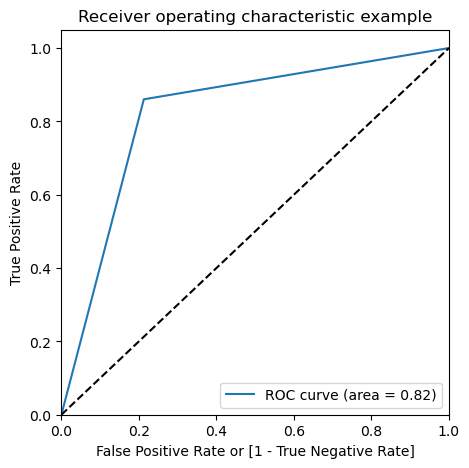

In [178]:
draw_roc(y_train_pred_final['Converted'],y_train_pred_final['Predicted'])

In [179]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.014062,0,1,0,0,0,0,0,0,0,0,0
1,0,0.263500,0,1,1,1,0,0,0,0,0,0,0
2,0,0.003708,0,1,0,0,0,0,0,0,0,0,0
3,0,0.650333,1,1,1,1,1,1,1,1,0,0,0
4,0,0.043483,0,1,0,0,0,0,0,0,0,0,0


In [180]:
# Fine-tuning the by calculating accuracy,sensitivity & specificity Score for selecting the appropriate cut-off or threshold

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.707713  0.974185  0.441242
0.2   0.2  0.755015  0.949821  0.560209
0.3   0.3  0.784692  0.926339  0.643046
0.4   0.4  0.806749  0.896169  0.717329
0.5   0.5  0.823752  0.860246  0.787258
0.6   0.6  0.829843  0.808045  0.851641
0.7   0.7  0.823078  0.738479  0.907677
0.8   0.8  0.786377  0.618682  0.954072
0.9   0.9  0.590016  0.189259  0.990773


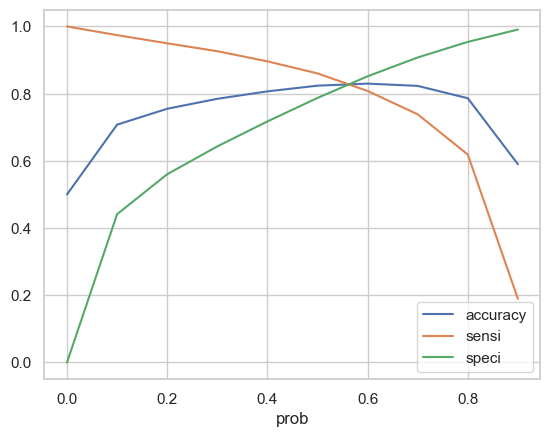

In [181]:
 # Trying to identity the cut off
sns.set(style="whitegrid")

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [182]:
numbers = [0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.014062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.263500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.003708,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.650333,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
4,0,0.043483,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [183]:
# Trying to identity the cut off
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.60]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.50  0.50  0.823752  0.860246  0.787258
0.51  0.51  0.824918  0.855943  0.793894
0.52  0.52  0.826188  0.851485  0.800892
0.53  0.53  0.827407  0.846612  0.808201
0.54  0.54  0.828858  0.842051  0.815665
0.55  0.55  0.829921  0.836763  0.823078
0.56  0.56  0.830413  0.831113  0.829713
0.57  0.57  0.830750  0.826396  0.835104
0.58  0.58  0.830595  0.820953  0.840236
0.59  0.59  0.830413  0.815043  0.845783
0.60  0.60  0.829843  0.808045  0.851641


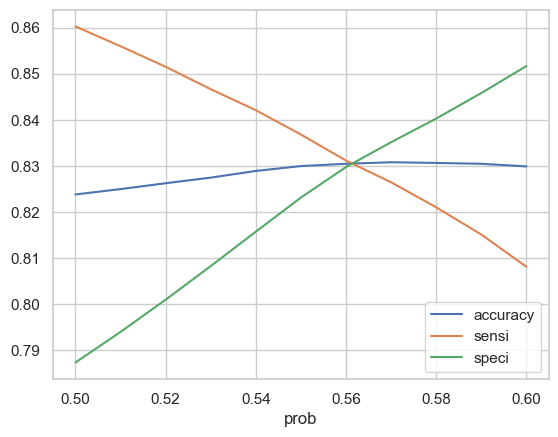

In [184]:
# Plot accuracy sensitivity and specificity for various probabilities.
sns.set(style="whitegrid")

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

In [185]:
# Creating Dataframe on train dataset to compare the predicted outcome and the actual outcome

y_train_pred_final_Cutoff = pd.DataFrame({'Converted':y_resampled_sm.values, 'Converted_prob':y_train_pred_Rfe})

y_train_pred_final_Cutoff.head()

,Converted,Converted_prob
0,0,0.014062
1,0,0.263500
2,0,0.003708
3,0,0.650333
4,0,0.043483


In [186]:
# LR Model on train dataset predicted score of above 0.56 as churn as per above understanding
y_train_pred_final_Cutoff['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.56 else 0)

y_train_pred_final_Cutoff

,Converted,Converted_prob,Predicted
0,0,0.014062,0
1,0,0.263500,0
2,0,0.003708,0
3,0,0.650333,1
4,0,0.043483,0
...,...,...,...
38577,1,0.818217,1
38578,1,0.196681,0
38579,1,0.836719,1
38580,1,0.939306,1


In [187]:
# Let's check the overall accuracy.
accuracy=metrics.accuracy_score(y_train_pred_final_Cutoff['Converted'],y_train_pred_final_Cutoff['Predicted'])

print(accuracy)

0.8304131460266445


In [188]:
# Let's check the overall confusion matrix.
confusion=metrics.confusion_matrix(y_train_pred_final_Cutoff['Converted'],y_train_pred_final_Cutoff['Predicted'])

print(confusion)

[[16006  3285]
 [ 3258 16033]]


In [189]:
TN=confusion[0,0] #True Negative
FP=confusion[0,1] #False Positive
FN=confusion[1,0] #False Negative
TP=confusion[1,1] #True Positive

In [190]:
# sensitivity Score calucation for selected threshold of 0.56

sensitivity=TP/float(FN+TP)

print(sensitivity)

0.8311129542273599


In [191]:
# specificity Score calucation for selected threshold of 0.56

specificity =TN/float(TN+FP)

print(specificity)

0.8297133378259292


###### Making Prediction on the test data- Selected Model

In [192]:
X_test_scale=X_test_scale[req_cols]
X_test_scale.shape

(9001, 12)

In [193]:
# Adding Constant column to the test dataset
X_test_SM = sm.add_constant(X_test_scale)
X_test_SM.shape

(9001, 13)

In [194]:
X_test_SM.head()

,const,loc_og_t2m_mou_8,loc_og_mou_8,std_og_mou_8,total_og_mou_6,loc_ic_t2m_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,av_rech_amt_data_8,monthly_2g_8,sachet_2g_8
0,1.0,0.028821,0.023547,0.000000,0.003197,0.032945,0.081711,0.0,0.224490,0.006743,0.080386,0.0,0.181818
1,1.0,0.073077,0.071872,0.000000,0.109922,0.052876,0.059244,0.0,0.076531,0.009890,0.031511,0.0,0.022727
2,1.0,0.006285,0.008334,0.053609,0.024342,0.011485,0.029150,0.0,0.045918,0.025624,0.000000,0.0,0.000000
3,1.0,0.000500,0.000791,0.000000,0.000771,0.000000,0.002281,0.0,0.005102,0.000000,0.000000,0.0,0.000000
4,1.0,0.014921,0.007419,0.000424,0.002125,0.010350,0.028406,0.0,0.091837,0.011238,0.084566,0.0,0.113636


In [195]:
y_test.shape

(9001,)

In [196]:
# Prediction on Test dataset
y_test_pred_Rfe= Log_M4.predict(X_test_SM)
y_test_pred_Rfe

0       0.001330
1       0.058880
2       0.418571
3       0.842410
4       0.059270
          ...   
8996    0.180751
8997    0.016772
8998    0.034890
8999    0.484398
9000    0.022357
Length: 9001, dtype: float64

In [197]:
# Reshapping the predicted outcome
y_test_pred_Rfe=y_test_pred_Rfe.values.reshape(-1)
y_test_pred_Rfe.shape

(9001,)

In [198]:
# Creating Dataframe on test dataset to compare the predicted outcome and the actual outcome
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred_Rfe})

y_test_pred_final.head()

,Converted,Converted_prob
0,0,0.001330
1,0,0.058880
2,0,0.418571
3,0,0.842410
4,0,0.059270


In [199]:
# LR Model on test dataset predicted score of above 0.56 as churn as per above understanding
y_test_pred_final['Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.56 else 0)

y_test_pred_final

,Converted,Converted_prob,Predicted
0,0,0.001330,0
1,0,0.058880,0
2,0,0.418571,0
3,0,0.842410,1
4,0,0.059270,0
...,...,...,...
8996,0,0.180751,0
8997,0,0.016772,0
8998,0,0.034890,0
8999,0,0.484398,0


In [200]:
# accuracy Score calucation for test dataset

accuracy=metrics.accuracy_score(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])

print(accuracy)

0.8244639484501722


In [201]:
# confusion metrics calucation for test dataset

confusion=metrics.confusion_matrix(y_test_pred_final['Converted'],y_test_pred_final['Predicted'])

print(confusion)

[[6848 1421]
 [ 159  573]]


In [202]:
TN=confusion[0,0] #True Negative
FP=confusion[0,1] #False Positive
FN=confusion[1,0] #False Negative
TP=confusion[1,1] #True Positive

In [203]:
# sensitivity Score calucation for test dataset

sensitivity=TP/float(FN+TP)

print(sensitivity)

0.7827868852459017


In [204]:
# specificity Score calucation for test dataset

specificity =TN/float(TN+FP)

print(specificity)

0.828153343814246


## Conclusion

###### Model Evaluation Numbers

##### Train Data

* Accuracy - 83.04 
* Specificity - 83.11
* Sensitivity - 82.97

##### Test Data 

* Accuracy - 82.44
* Specificity - 78.27
* Sensitivity - 82.81